# Project: Predicting Median House Price in Boston


In this project, you are going to model the median home price of various houses across U.S. Census tracts in the city of Boston. Note that we are predicting a continuous, numeric output (price) based on a combination of discrete features. Thus, this is a regression problem.

In [ ]:
# Let us import some libraries
import matplotlib.pyplot as plt
% matplotlib inline

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [ ]:
# loading the data
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 1. Clean Up Data and Perform Exporatory Data Analysis


Boston data is from scikit-learn datasets library. Thus, it should be in clean format. Nevertheless, we should always perform exploratory data analysis before we start our analysis in detail.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


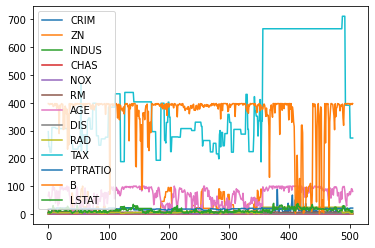

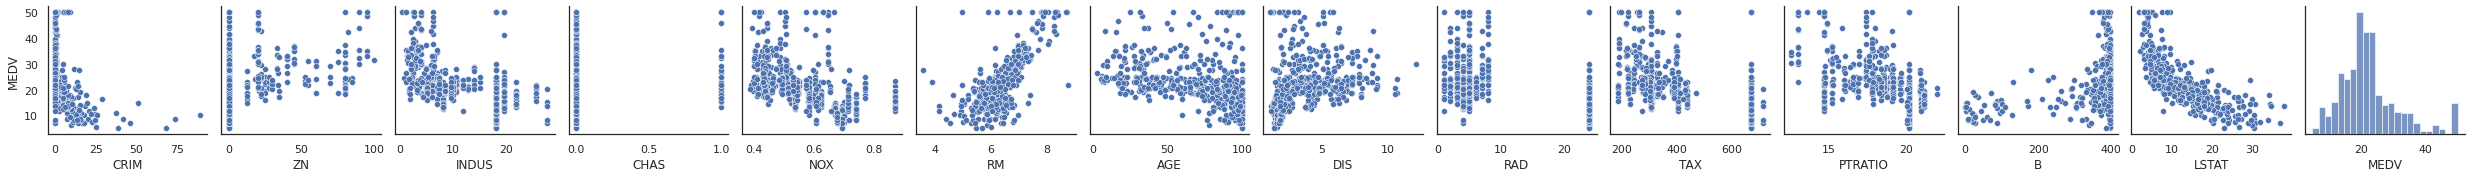

In [ ]:
# Exploratory data analysis:
# Include: total nulls, data types, shape, summary statistics, and the number of unique values for each column in the dataset.
# You may use plots to describe any relationships between different columns.

#answer 

#for EDA purpose, i'll use X as data set because y is response variable 
X.info() #null check 
X.dtypes #data types
X.shape #shape
X.describe() #summary stat

#plot 
import matplotlib.pyplot as plt
import seaborn as sns

#comparision between exploratory variables
X.plot() 

#I combine 2 df horizontally to plot relationship between exploratory and response varible 
concatenated = pd.concat([X, y], axis=1) 
sns.set(style="white")
sns.pairplot(concatenated, y_vars='MEDV')
#as we can see, CRIM located mostly at the lower level income, etc. 




## 2. Build a Lasso regression model using Scikit-Learn

Use the toolset in Scikit-Learn to build a Lasso regression model to predict our target variable, MEDV. Use a 10-fold cross validation in building your model. Score your predictions. What do these results tell us?


In [ ]:
# Lasso regression model with 10-fold cross-validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = Lasso(alpha=0.1)
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
#Accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.71 (+/- 0.25)


## 3. Build a Random forest regression model using Scikit-Learn

Use the toolset in Scikit-Learn to build a Random forest regression model to predict our target variable, MEDV. Use a 10-fold cross validation in building your model. Score your predictions. What do these results tell us?

In [ ]:
# Random forest regression model with 10-fold cross-validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
#Accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




Accuracy: 0.86 (+/- 0.18)


## 4. Build a Support Vector Machine (SVM) model using Scikit-Learn

Use the toolset in Scikit-Learn to build a Support Vector Machine (SVM) regression model to predict our target variable, MEDV. Use a 10-fold cross validation in building your model. Score your predictions. What do these results tell us?

In [ ]:
# Support Vector Machine (SVM) regression model with 10-fold cross-validation
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = SVR(kernel = 'rbf')
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
#Accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.21 (+/- 0.33)
